Everything in this notebook is my work for the 7th exercise of the AML course.

Wine quality dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from collections import Counter


red_wine_data = pd.read_csv("wine_quality_data/winequality-red.csv", sep=';')
red_wine_data.head()   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1) Convert the non-numeric values to numeric

In [225]:
red_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

After checking if there are any non-numeric values, we can conclude that we don't have and we don't have anything to transform.

(2) Handle sparse data / missing values

In [226]:
red_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The red wine dataset has no missing data. We don't have to handle anything.

(3) Split the data and normalize

In [227]:
red_wine_Xdata = red_wine_data.drop(columns=['quality'])
red_wine_Ydata = red_wine_data['quality']

red_wine_Xtrain, red_wine_Xtest, red_wine_Ytrain, red_wine_Ytest = train_test_split(
    red_wine_Xdata, red_wine_Ydata, test_size=0.3
)

scaler = StandardScaler()
red_wine_Xtrain = scaler.fit_transform(red_wine_Xtrain)
red_wine_Xtest = scaler.transform(red_wine_Xtest)

red_wine_Ytrain = red_wine_Ytrain.values
red_wine_Ytest = red_wine_Ytest.values

Iris dataset

In [228]:
iris_data = pd.read_csv("iris/iris.data")
iris_data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
iris_data.head()  

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


(1) Convert the non-numeric values to numeric

In [229]:
iris_data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

After checking if there are any non-numeric values, we can conclude that we don't have and we don't have anything to transform.

(2) Handle sparse data / missing values

In [230]:
iris_data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

The iris dataset has no missing data. We don't have to handle anything.

(3) Split the data, normalize and add bias

In [231]:
iris_Xdata = iris_data.drop(columns=['class'])
iris_Ydata = iris_data['class']

iris_Xtrain, iris_Xtest, iris_Ytrain, iris_Ytest = train_test_split(
    iris_Xdata, iris_Ydata, test_size=0.3
)

scaler = StandardScaler()
iris_Xtrain = scaler.fit_transform(iris_Xtrain)
iris_Xtest = scaler.transform(iris_Xtest)

iris_Ytrain = iris_Ytrain.values
iris_Ytest = iris_Ytest.values

# Implement K-Nearest Neighbor (KNN)

(1) Implement a similarity (or distance) measure. 

I use Minkowski distance, because it's generalized form of all distances (i.e. Euclidean, Manhattan, Chebyshev distance).

In [232]:
def minkowski_distance(x1, x2, p=2):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

(2) Implement a function that returns the top K Nearest Neighbors for a given query (data point).

In [233]:
def get_neighbors(X_train, y_train, query, k, p=2):
    distances = []
    for i, x_train in enumerate(X_train):
        dist = minkowski_distance(query, x_train, p)
        distances.append((dist, y_train[i]))
    
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    return neighbors

(3) Provide the prediction for a given query (for a classification task, you can use majority voting; for regression, you can use the mean).

In [234]:
def predict(X_train, y_train, query, k, p=2, task='class'):
    
    neighbors = get_neighbors(X_train, y_train, query, k, p)

    if task == 'class':
        # Majority voting
        classes = [neighbor[1] for neighbor in neighbors]
        prediction = Counter(classes).most_common(1)[0][0]
        
    elif task == 'reg':
        # Mean value
        values = [neighbor[1] for neighbor in neighbors]
        prediction = np.mean(values)
    return prediction

(4) Measure the quality of your prediction.

I evaluate the classification model by using *accuracy_score* and the regression model by using *mean_squared_error*. Mean squared error is a common choice for evaluating regression models, because the target is continuous and predicting it exactly is critical. However, when the values aren't continuous, *accuracy_score* provides better understanding of classification models and it's easily interpretable.

In [235]:
def evaluate(X_train, y_train, X_test, y_test, k, p=2, task='class'):
    predictions = [predict(X_train, y_train, x, k, p, task) for x in X_test]
    
    if task == 'class':
        score = accuracy_score(y_test, predictions)
        print(f"Accuracy: {score * 100:.2f}%")
        
    elif task == 'reg':
        score = mean_squared_error(y_test, predictions)
        print(f"Mean Squared Error: {score:.2f}")

Example usage on the Iris Dataset

In [236]:
task_type = 'class'
k = 5

evaluate(iris_Xtrain, iris_Ytrain, iris_Xtest, iris_Ytest, k, task=task_type)

Accuracy: 93.33%


# Determine the optimal value for K

To choose the best value for K, one can perform Randomized Search or Grid Search. A good appoach is to choose odd value for K for classification to avoid ties when voting.

I perform Grid Search over predefined values. The value of K that gives the best accuracy or mean squared error result for classification or regression respectively. 

In [237]:
def grid_search_k(X_train, y_train, X_test, y_test, k_values, p=2, task='class', plot=False):
    results = {}
    
    for k in k_values:
        predictions = [predict(X_train, y_train, x, k, p, task) for x in X_test]
        
        if task == 'class':
            score = accuracy_score(y_test, predictions)
            print(f"k={k}, Accuracy: {score * 100:.2f}%")
        elif task == 'reg':
            score = mean_squared_error(y_test, predictions)
            print(f"k={k}, Mean Squared Error: {score:.2f}")
        
        results[k] = score
    
    if task == 'class':
        best_k = max(results, key=results.get)
        ylabel = "Accuracy"
    elif task == 'reg':
        best_k = min(results, key=results.get)
        ylabel = "Mean Squared Error"
    
    print(f"Best k: {best_k} with score: {results[best_k]:.2f}")
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-')
        plt.title(f"Grid Search Results for k (Task: {task})")
        plt.xlabel("k (Number of Neighbors)")
        plt.ylabel(ylabel)
        plt.grid()
        plt.show()
    
    return best_k

k=1, Mean Squared Error: 0.54
k=2, Mean Squared Error: 0.49
k=3, Mean Squared Error: 0.50
k=4, Mean Squared Error: 0.49
k=5, Mean Squared Error: 0.49
k=6, Mean Squared Error: 0.48
k=7, Mean Squared Error: 0.47
k=8, Mean Squared Error: 0.45
k=9, Mean Squared Error: 0.45
k=10, Mean Squared Error: 0.44
k=11, Mean Squared Error: 0.44
k=12, Mean Squared Error: 0.43
k=13, Mean Squared Error: 0.43
k=14, Mean Squared Error: 0.43
k=15, Mean Squared Error: 0.43
k=16, Mean Squared Error: 0.43
k=17, Mean Squared Error: 0.43
k=18, Mean Squared Error: 0.43
k=19, Mean Squared Error: 0.43
k=20, Mean Squared Error: 0.43
Best k: 16 with score: 0.43


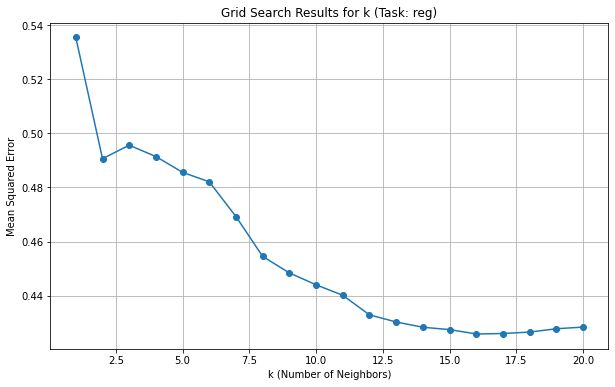

In [238]:
k_values = range(1, 21)  

task_type = 'reg'  

best_k = grid_search_k(red_wine_Xtrain, red_wine_Ytrain, red_wine_Xtest, red_wine_Ytest, k_values, task=task_type, plot=True)

k=1, Accuracy: 63.33%
k=2, Accuracy: 63.33%
k=3, Accuracy: 60.00%
k=4, Accuracy: 60.00%
k=5, Accuracy: 58.96%
k=6, Accuracy: 58.75%
k=7, Accuracy: 58.75%
k=8, Accuracy: 60.00%
k=9, Accuracy: 58.33%
k=10, Accuracy: 60.00%
k=11, Accuracy: 60.83%
k=12, Accuracy: 60.83%
k=13, Accuracy: 60.21%
k=14, Accuracy: 61.25%
k=15, Accuracy: 60.42%
k=16, Accuracy: 60.62%
k=17, Accuracy: 60.00%
k=18, Accuracy: 59.17%
k=19, Accuracy: 59.17%
k=20, Accuracy: 58.96%
Best k: 1 with score: 0.63


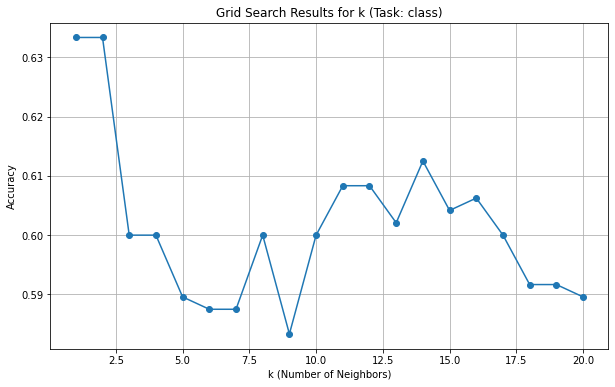

In [239]:
k_values = range(1, 21)  

task_type = 'class'  

best_k = grid_search_k(red_wine_Xtrain, red_wine_Ytrain, red_wine_Xtest, red_wine_Ytest, k_values, task=task_type, plot=True)

After performing grid search with values between 0 and 20, we see that for classification the best value is for k is 1 and for regression the best value for k is 16.

# Compare KNN Algorithm with Tree-Based Methods

(1) Use Nearest Neighbor and Decision Tree provided by Scikit-Learn to solve the classification
task for the two datasets.

In [ ]:
knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': range(1, 21),   
    'p': [1, 2]                   
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy', verbose=1)
knn_grid_search.fit(red_wine_Xtrain, red_wine_Ytrain)

print("Best KNN Parameters:", knn_grid_search.best_params_)
print("Best KNN CV Score:", knn_grid_search.best_score_)

best_knn = knn_grid_search.best_estimator_
knn_test_predictions = best_knn.predict(red_wine_Xtest)
knn_test_accuracy = accuracy_score(red_wine_Ytest, knn_test_predictions)
print("KNN Test Accuracy:", knn_test_accuracy)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best KNN Parameters: {'n_neighbors': 1, 'p': 1}
Best KNN CV Score: 0.6005605381165919
KNN Test Accuracy: 0.6125


In [241]:
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 5, 10, 20],   
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5]     
}

# Grid Search with cross-validation
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy', verbose=1)
dt_grid_search.fit(red_wine_Xtrain, red_wine_Ytrain)

# Best hyperparameters and score
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best Decision Tree CV Score:", dt_grid_search.best_score_)

best_dt = dt_grid_search.best_estimator_
dt_test_predictions = best_dt.predict(red_wine_Xtest)
dt_test_accuracy = accuracy_score(red_wine_Ytest, dt_test_predictions)
print("Decision Tree Test Accuracy:", dt_test_accuracy)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree CV Score: 0.5996877001921844
Decision Tree Test Accuracy: 0.58125


In [242]:
knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': range(1, 21),   
    'p': [1, 2]                   
}

# Grid Search with cross-validation
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy', verbose=1)
knn_grid_search.fit(iris_Xtrain, iris_Ytrain)

# Best hyperparameters and score
print("Best KNN Parameters:", knn_grid_search.best_params_)
print("Best KNN CV Score:", knn_grid_search.best_score_)

best_knn = knn_grid_search.best_estimator_
knn_test_predictions = best_knn.predict(iris_Xtest)
knn_test_accuracy = accuracy_score(iris_Ytest, knn_test_predictions)
print("KNN Test Accuracy:", knn_test_accuracy)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best KNN Parameters: {'n_neighbors': 9, 'p': 1}
Best KNN CV Score: 0.9614285714285714
KNN Test Accuracy: 0.9555555555555556


In [243]:
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
dt_param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 5, 10, 20],   
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5]     
}

# Grid Search with cross-validation
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy', verbose=1)
dt_grid_search.fit(iris_Xtrain, iris_Ytrain)

# Best hyperparameters and score
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best Decision Tree CV Score:", dt_grid_search.best_score_)

best_dt = dt_grid_search.best_estimator_
dt_test_predictions = best_dt.predict(iris_Xtest)
dt_test_accuracy = accuracy_score(iris_Ytest, dt_test_predictions)
print("Decision Tree Test Accuracy:", dt_test_accuracy)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree CV Score: 0.9519047619047619
Decision Tree Test Accuracy: 0.9555555555555556


# Analysis of the results


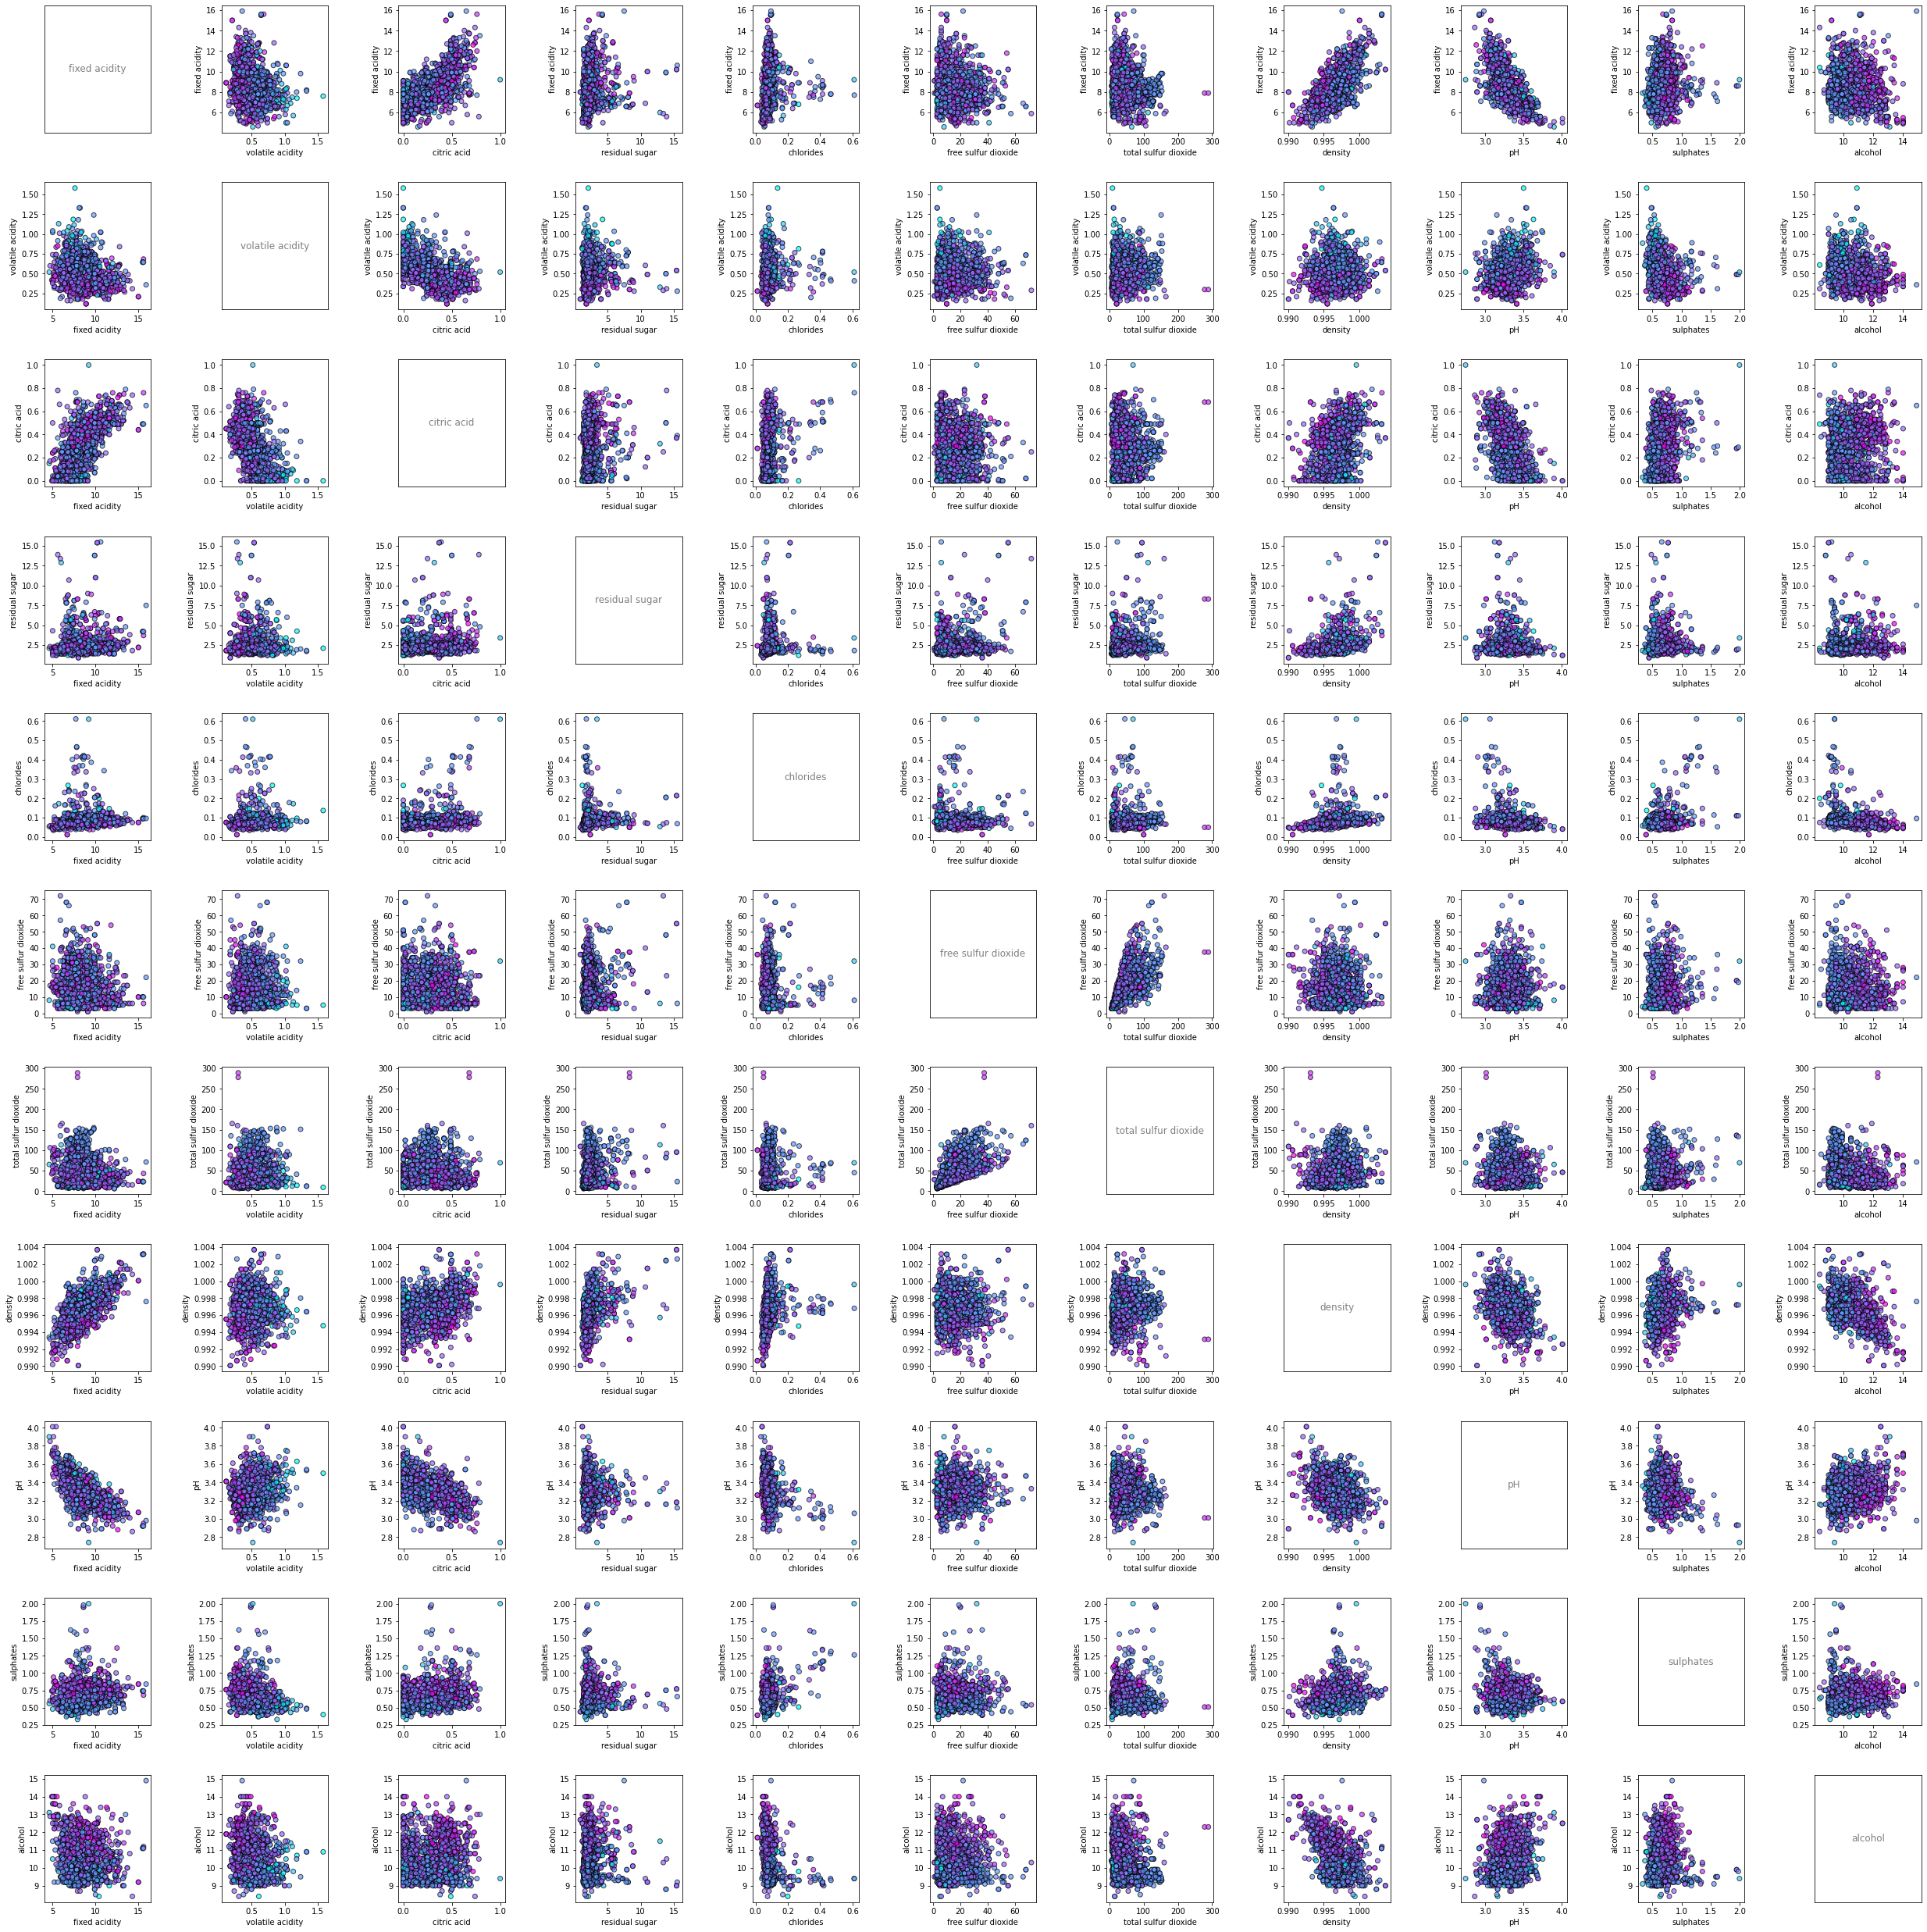

In [ ]:
X = red_wine_data.iloc[:, :-1].values
y = red_wine_data['quality'].values

f, axes = plt.subplots(11, 11, figsize=(35, 35))

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
            'pH', 'sulphates', 'alcohol']

for i in range(11): 
    for j in range(11):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: Names of features
            ax.text(0.5, 0.5, features[i], ha='center', va='center', size=12, alpha=0.5)
            ax.set_xticks([]) 
            ax.set_yticks([])
        else:
            # Off-diagonal: Create scatterplots
            ax.scatter(X[:, j], X[:, i], c=y, cmap='cool', edgecolors='k', alpha=0.7)
            ax.set_xlabel(features[j])
            ax.set_ylabel(features[i])

plt.tight_layout(pad=3.0)
plt.show()

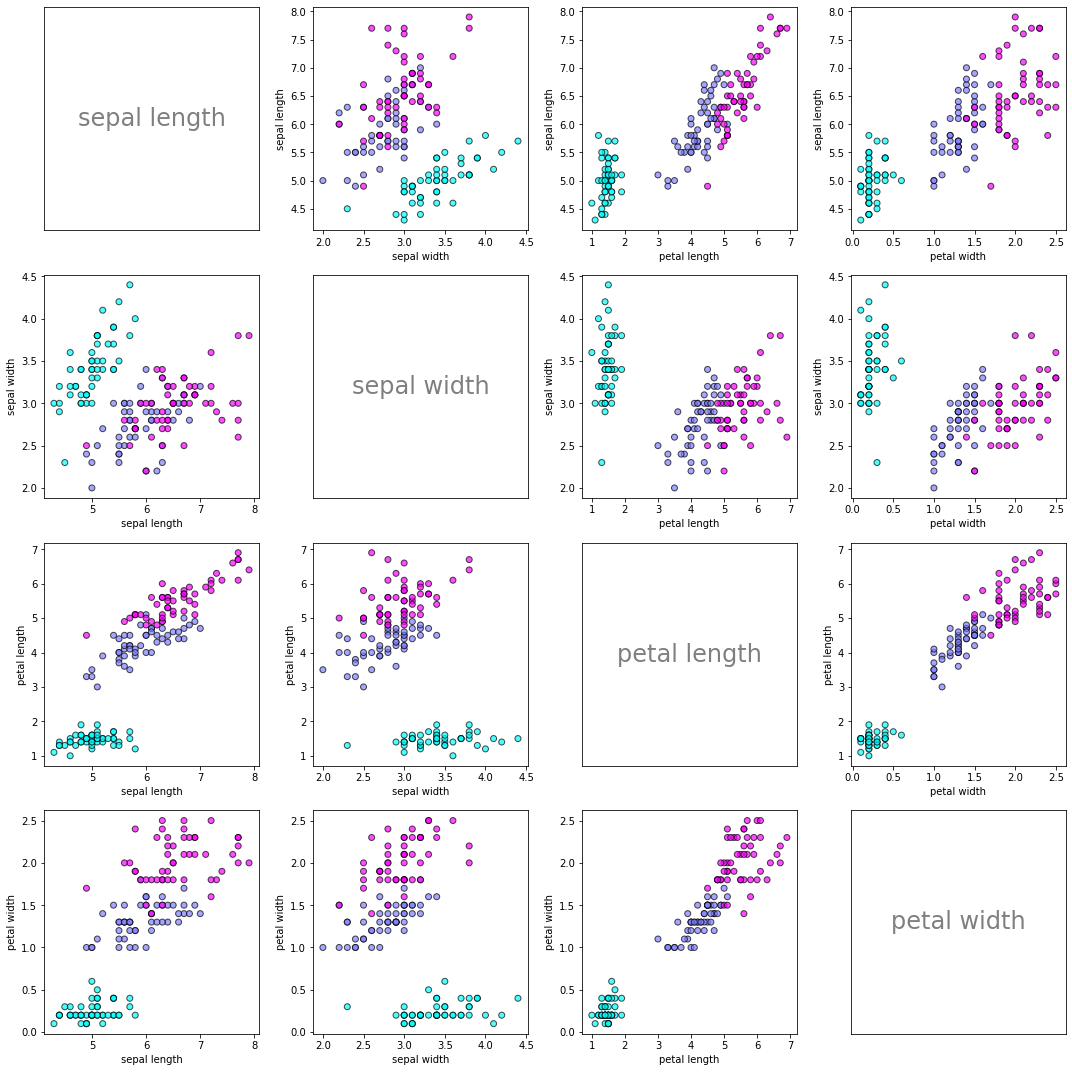

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

iris_data['class'] = encoder.fit_transform(iris_data['class'])

X = iris_data.iloc[:, :-1].values
y = iris_data['class'].values

f, axes = plt.subplots(4, 4, figsize=(15, 15))


features = ['sepal length', 'sepal width', 'petal length', 'petal width']

for i in range(4):
    for j in range(4):
        ax = axes[i, j]  
        
        if i == j:
            # Diagonal: Add text labels for the feature names
            ax.text(0.5, 0.5, features[i], ha='center', va='center', size=24, alpha=0.5)
            ax.set_xticks([])  # Remove x ticks
            ax.set_yticks([])  # Remove y ticks
        else:
            # Off-diagonal: Create scatterplots
            ax.scatter(X[:, j], X[:, i], c=y, cmap=plt.cm.cool, edgecolors='k', alpha=0.7)
            ax.set_xlabel(features[j])
            ax.set_ylabel(features[i])

plt.tight_layout()
plt.show()

Both models perform very similar on the datasets. We see that features of the red wine dataset aren't linearly separatable in any two dimensions (see plots) and this makes it hard for the two models to distinguish groups, which is essential. This leads to bad predictions for both models.
This is supported by the fact that the best K for red wine classification model is 1. Higher values confuse the model, because the data is mixed. For the same reason the decision tree chooses simpler parameters. On the other hand, the features of the iris dataset are linearly separateable in almost any two dimensions (see plots) and this makes it easier for the two classification models to identify groups of points . 